In [7]:
import fastf1 as ff1
from matplotlib import pyplot as plt

from fastf1 import plotting
plotting.setup_mpl()

# Variables

In [12]:
directory = '../Telemetry/2021/TUR/Alpine/Race/'
year = 2021
raceNumber = 16

driver1_name = 'OCO'
driver1_fullname = 'Ocon'
driver2_name = 'ALO'
driver2_fullname = 'Alonso'

graphLinediWidth = 0.3
color1 = plotting.TEAM_COLORS['Alpine']
color2 = plotting.TEAM_COLORS['McLaren']

# Loads Session DATA

In [9]:
ff1.Cache.enable_cache('cache')

race = ff1.get_session(year, raceNumber, 'R')

laps = race.load_laps()
lapsTelemetry = race.load_laps(with_telemetry=True)

core        WARNING 	Ergast API lookup failed. The session is very recent and not yet available or does not exist.
core           INFO 	Loading laps for Turkish Grand Prix - Race [v2.1.6]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['77', '33', '16', '10', '14', '11', '4', '18', '22', '5', '44', '31', '63', '47', '6', '99', '7', '9', '55', '3']
core           INFO 	Loading laps for Turkish Grand Prix - Race [v2.1.6]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api       

# Initialization

In [10]:
driver1 = lapsTelemetry.pick_driver(driver1_name).pick_fastest()
driver2 = lapsTelemetry.pick_driver(driver2_name).pick_fastest()

driver1LapsWithoutBox = laps.pick_driver(driver1_name).pick_wo_box()
driver2LapsWithoutBox = laps.pick_driver(driver2_name).pick_wo_box()

driver1Laps = laps.pick_driver(driver1_name)
driver2Laps = laps.pick_driver(driver2_name)

driver1Data = driver1.telemetry
driver2Data = driver2.telemetry


name1 = driver1_fullname
name2 = driver2_fullname

# Telemetry charts
## Fastest Lap

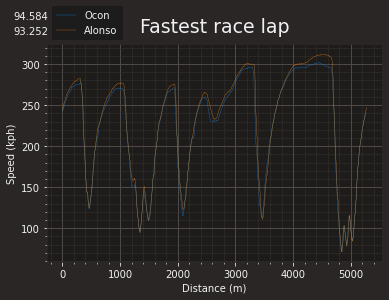

In [13]:
fig, ax = plt.subplots()


ax.plot(driver1Data['Distance'], driver1Data['Speed'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['Speed'], color=color2, linewidth=graphLinediWidth, label=name2)

ax.set_title("Fastest race lap")
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Speed (kph)")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.text(-0.05, 1.13, driver1['LapTime'].total_seconds(),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
plt.text(-0.05, 1.06,driver2['LapTime'].total_seconds(),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)

plt.savefig(directory + 'telemetrySpeed.png', dpi=1200)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(driver1Data['Distance'], driver1Data['RPM'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['RPM'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title("Fastest race lap")
ax.set_xlabel("Distance (m)")
ax.set_ylabel("RPM")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory +'telemetryRPM.png', dpi=1200)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(driver1Data['Distance'], driver1Data['nGear'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['nGear'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title("Fastest race lap")
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Gear)")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryGear.png', dpi=1200)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(driver1Data['Distance'], driver1Data['Throttle'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['Throttle'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title("Fastest race lap")
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Throttle pedal pressure 0-100")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryThrottle2.png', dpi=1200)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(driver1Data['Distance'], driver1Data['Brake'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['Brake'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title("Fastest race lap")
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Brake pedal pressure 0-100")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryBrake.png', dpi=1200)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(driver1Data['Distance'], driver1Data['DRS'], color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2Data['Distance'], driver2Data['DRS'], color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title("Fastest race lap")
ax.set_xlabel("Distance (m)")
ax.set_ylabel("DRS indicator")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'telemetryDRS.png', dpi=1200)
plt.show()

## Race pace

In [ ]:
plotting.setup_mpl()
fig, ax = plt.subplots()

plt.ylim(top=100, bottom=93)

ax.plot(driver1LapsWithoutBox['LapNumber'], driver1LapsWithoutBox['LapTime'].dt.total_seconds(), color=color1, linewidth=graphLinediWidth, label=name1)
ax.plot(driver2LapsWithoutBox['LapNumber'], driver2LapsWithoutBox['LapTime'].dt.total_seconds(), color=color2, linewidth=graphLinediWidth, label=name2)
ax.set_title("Race pace")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'lapsTrimmed.png', dpi=1200)
plt.show()

In [ ]:
import numpy as np

plotting.setup_mpl()
fig, ax = plt.subplots()

plt.ylim(top=2, bottom=-2)


o = driver1Laps['LapTime'].dt.total_seconds().to_numpy()
a = driver2Laps['LapTime'].dt.total_seconds().to_numpy()

#o = np.delete(o, -1, 0) # remove last lap for the non-lapped drivers

diff = np.subtract(o, a)
ax.plot(driver1Laps['LapNumber'], diff, color='green', linewidth=1)
ax.set_title("Race pace")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Delta (Ocon to Alonso)")
#ax.legend(bbox_to_anchor=(0,1),loc=3)
ma = np.ma.MaskedArray(diff, mask=np.isnan(diff))
avg = "average " + str(round(np.ma.average(ma), 3))
med = "median " + str(round(np.ma.median(ma), 3))
plt.text(-0.05, 1.13,avg,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
plt.text(-0.05, 1.06,med,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
plt.savefig(directory + 'diff.png', dpi=1200)
plt.show()

## Experimental
### Race pace with tyre compounds

In [ ]:
plotting.setup_mpl()
fig, ax = plt.subplots()

driver1LapsHard = driver1Laps.pick_tyre('HARD')
driver2LapsHard = driver2Laps.pick_tyre('HARD')


driver1LapsMedium = driver1Laps.pick_tyre('MEDIUM')
driver2LapsMedium = driver2Laps.pick_tyre('MEDIUM')

colorHard = 'white'
colorMedium = 'yellow'

ax.plot(driver1LapsHard['LapNumber'], driver1LapsHard['LapTime'].dt.total_seconds(), color=colorHard, linewidth=graphLinediWidth, label=name1, linestyle='-')
ax.plot(driver2LapsHard['LapNumber'], driver2LapsHard['LapTime'].dt.total_seconds(), color=colorHard, linewidth=graphLinediWidth, label=name2, linestyle='--')

ax.plot(driver1LapsMedium['LapNumber'], driver1LapsMedium['LapTime'].dt.total_seconds(), color=colorMedium, linewidth=graphLinediWidth, label=name1, linestyle='-')
ax.plot(driver2LapsMedium['LapNumber'], driver2LapsMedium['LapTime'].dt.total_seconds(), color=colorMedium, linewidth=graphLinediWidth, label=name2, linestyle='--')

ax.set_title("Race pace")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'laps.png', dpi=1200)
plt.show()

In [ ]:
plotting.setup_mpl()
fig, ax = plt.subplots()

plt.ylim(top=100, bottom=90)


driver1LapsHard = driver1Laps.pick_tyre('HARD')
driver2LapsHard = driver2Laps.pick_tyre('HARD')


driver1LapsMedium = driver1Laps.pick_tyre('MEDIUM')
driver2LapsMedium = driver2Laps.pick_tyre('MEDIUM')


ax.plot(driver1LapsHard['LapNumber'], driver1LapsHard['LapTime'].dt.total_seconds(), color=colorHard, linewidth=graphLinediWidth, label=name1, linestyle='-')
ax.plot(driver2LapsHard['LapNumber'], driver2LapsHard['LapTime'].dt.total_seconds(), color=colorHard, linewidth=graphLinediWidth, label=name2, linestyle='--')

ax.plot(driver1LapsMedium['LapNumber'], driver1LapsMedium['LapTime'].dt.total_seconds(), color=colorMedium, linewidth=graphLinediWidth, label=name1, linestyle='-')
ax.plot(driver2LapsMedium['LapNumber'], driver2LapsMedium['LapTime'].dt.total_seconds(), color=colorMedium, linewidth=graphLinediWidth, label=name2, linestyle='--')

ax.set_title("Race pace")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.legend(bbox_to_anchor=(0,1),loc=3)

plt.savefig(directory + 'lapsTrimmedWithCompounds.png', dpi=1200)
plt.show()